In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Let the number of days is x while number of total cases are y1
##### Given that we have to fit y1=c1*exp(c2*x) to the data points
##### On taking log(y1)=log(c1)+c2*x
##### Let us take log(y1)=y, log(c1)=c, c2=m
##### Our equation is y=mx+c

In [2]:
#Preprocessing Data

data=pd.read_csv("task2.csv")
y1=data['Total cases']
x=data['Day']
y1=y1.to_numpy()
y=np.log(y1)
x=x.to_numpy()

In [3]:
# This function defines Gradient Descent Algorithm

def gradient_descent(x,y,iterations,learning_rate):
    n=len(x)
    m=0
    c=0
    m_list=[]
    c_list=[]
    loss_list=[]
    for i in range(iterations):
        y_pred=m*x+c
        loss_list.append((1/n)*sum(val**2 for val in (y-y_pred)))
        m_list.append(m)
        c_list.append(c)
        md=-(2/n)*sum(x*(y-y_pred))
        cd=-(2/n)*sum(y-y_pred)
        m=m-learning_rate*md
        c=c-learning_rate*cd
    return m,c,m_list,c_list,loss_list


### Question 1

In [4]:
# Let total number of cases of 110th day are N
m,c,m_list,c_list,loss_list=gradient_descent(x,y,5000,0.0001)

N=np.exp(m*110+c)
print(N)

288673.2268651627


### Question 2

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


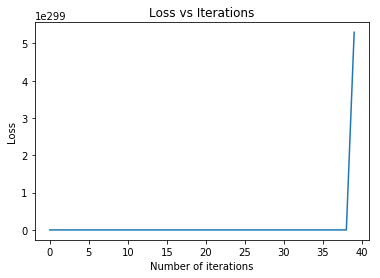

In [7]:
# If learning_rate=1
m,c,m_list,c_list,loss_list=gradient_descent(x,y,5000,1)
plt.plot(loss_list)
plt.title("Loss vs Iterations")
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.savefig('alpha_1', bbox_inches='tight')

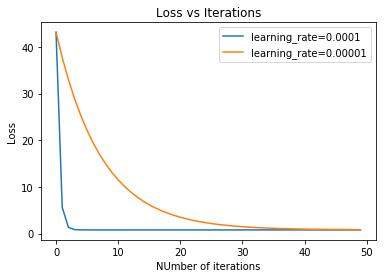

In [9]:
# If learning_rate=0.00001
m1,c1,m_list1,c_list1,loss_list1=gradient_descent(x,y,5000,0.0001)
m,c,m_list,c_list,loss_list=gradient_descent(x,y,5000,0.00001)
plt.plot(loss_list1[0:50])
plt.plot(loss_list[0:50])
plt.legend(['learning_rate=0.0001','learning_rate=0.00001'])
plt.title("Loss vs Iterations")
plt.xlabel('NUmber of iterations')
plt.ylabel('Loss')
plt.savefig('alpha_10e-5', bbox_inches='tight')

### Question 3

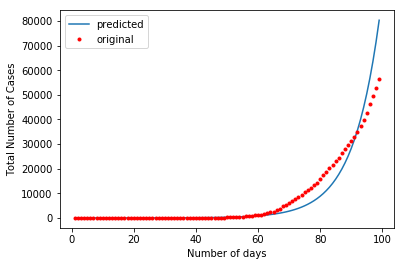

In [7]:
m,c,m_list,c_list,loss_list=gradient_descent(x,y,5000,0.0001)
plt.plot(x,np.exp(m*x+c))
plt.plot(x,y1,'r.')
plt.legend(['predicted','original'])
plt.xlabel("Number of days")
plt.ylabel("Total Number of Cases")
plt.savefig('plot', bbox_inches='tight')